In [1]:
import cv2
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow_docs.vis import embed
import numpy as np
import pandas as pd
import csv


# Import matplotlib libraries
from matplotlib import pyplot as plt

# Training

In [2]:
keypts_data=pd.read_csv("yoga_trainfile.csv")
keypts_data=keypts_data.dropna()
keypts_data.head()

nose_x    nose_y  left_eye_x  left_eye_y  right_eye_x  right_eye_y  \
0  0.518443  0.460143    0.523679    0.468330     0.523259     0.465489   
1  0.526235  0.456730    0.519109    0.461838     0.519638     0.455275   
2  0.489976  0.459468    0.489361    0.459117     0.489390     0.464343   
3  0.526482  0.435246    0.514502    0.432786     0.526369     0.441239   
4  0.566019  0.442740    0.563851    0.445759     0.568645     0.443410   

   left_ear_x  left_ear_y  right_ear_x  right_ear_y  ...  right_hip_y  \
0    0.529428    0.475832     0.527838     0.466152  ...     0.466730   
1    0.515460    0.469310     0.516217     0.446034  ...     0.459463   
2    0.499798    0.459023     0.490287     0.467174  ...     0.463804   
3    0.518511    0.441381     0.524584     0.459959  ...     0.467816   
4    0.550942    0.450137     0.556596     0.443311  ...     0.444444   

   left_knee_x  left_knee_y  right_knee_x  right_knee_y  left_ankle_x  \
0     0.567665     0.464992      0.575585      0.442459      0.612255   
1     0.562737     0.508495      0.561161      0.438416      0.611385   
2     0.569211     0.441075      0.589492      0.466841      0.602092   
3     0.568014     0.406399      0.587279      0.432886      0.602397   
4     0.603933     0.411319      0.608691      0.416659      0.617096   

   left_ankle_y  right_ankle_x  right_ankle_y         label  
0      0.483376       0.615350       0.464559  Bhujangasana  
1      0.517282       0.613412       0.492291  Bhujangasana  
2      0.478729       0.606137       0.480946  Bhujangasana  
3      0.428676       0.609949       0.450539  Bhujangasana  
4      0.450826       0.621526       0.448317  Bhujangasana  

[5 rows x 35 columns]

In [3]:
len(keypts_data)

246

In [ ]:
keypts_data=keypts_data.reset_index(drop=True)
keypts_data.head()

In [4]:
fields = ['Sample', 'Label'] 

with open('yoga_trial_train.csv', 'a') as csvfile:
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    

outer_list=[]
inner_list=[]
for i in range(0,len(keypts_data)-1):
    if(keypts_data['label'][i]==keypts_data['label'][i+1]):
        inner_list.append(keypts_data.iloc[i].drop('label').values)
    else:
        inner_list.append(keypts_data.iloc[i].drop('label').values)
        outer_list.append(inner_list)
        outer_list.append(keypts_data['label'][i])
        with open('yoga_trial_train.csv', 'a') as csvfile:
            csvwriter = csv.writer(csvfile) 
            csvwriter.writerow(outer_list)
        inner_list=[]
        outer_list=[]
        

In [2]:
final_train=pd.read_csv('MAIN_FINAL_TRAIN.csv')
final_train=final_train.dropna()
final_train=final_train.reset_index(drop=True)
print(final_train.head())
len(final_train)

                                              Sample         Label
0  [array([0.78621894, 0.87021947, 0.7801042, 0.8...  Bhujangasana
1  [array([0.5703675, 0.6776938, 0.5562466, 0.690...    Padamasana
2  [array([0.56614625, 0.45965046, 0.55293095, 0....     Shavasana
3  [array([0.24351352, 0.734712, 0.23264247, 0.74...      Tadasana
4  [array([0.3708398, 0.62254435, 0.35274792, 0.6...   Trikonasana


144

In [5]:
import re
test=[]
outer_list=[]
test.append(final_train['Sample'])
# print(len(test[0][0].split(']')))
# print(len(test[0][0]))
# print(test[0])
for i in range(0,144):
    inner_list=[]
    for j in range(0,len(test[0][i].split(']'))-2): 
        res=test[0][i].split(']')[j]
        inner_list.append(get_array_from_string(res))
    outer_list.append(inner_list)


print(outer_list)
# print(type(outer_list))

[[[0.78621894, 0.87021947, 0.7801042, 0.87738633, 0.77937704, 0.8753842, 0.7547425, 0.86347234, 0.75545913, 0.86047244, 0.7497095, 0.8122004, 0.7793317, 0.81107634, 0.7556961, 0.68825954, 0.7984366, 0.69402623, 0.78506917, 0.6002404, 0.8078833, 0.5847824, 0.7335595, 0.5786643, 0.74406546, 0.5759433, 0.7438633, 0.43917832, 0.77175796, 0.43098912, 0.72000456, 0.33020774, 0.7472891, 0.30311382], [0.7752273, 0.87912154, 0.7615156, 0.88218987, 0.7638898, 0.880481, 0.74586654, 0.85848904, 0.7511187, 0.8573169, 0.74968785, 0.8038533, 0.78395736, 0.803237, 0.7541457, 0.68630564, 0.78687453, 0.68783003, 0.78530014, 0.6061284, 0.8075648, 0.59034526, 0.72953904, 0.571646, 0.74228215, 0.5710942, 0.74337554, 0.4428535, 0.77108294, 0.43309897, 0.7234162, 0.32902282, 0.7496727, 0.30223575], [0.65791464, 0.8615759, 0.6403765, 0.85983056, 0.64234, 0.8587276, 0.64424956, 0.82822734, 0.64882606, 0.82355535, 0.6637171, 0.7666503, 0.6844162, 0.7744477, 0.69224685, 0.68377215, 0.7217392, 0.6856886, 0.729154

In [3]:
def get_array_from_string(arr_string):
  return [float(i) for i in re.findall(r'0.\d+', arr_string)]

In [6]:
y_train=final_train['Label']
y_train

0      Bhujangasana
1        Padamasana
2         Shavasana
3          Tadasana
4       Trikonasana
           ...     
139    Bhujangasana
140      Padamasana
141       Shavasana
142        Tadasana
143     Trikonasana
Name: Label, Length: 144, dtype: object

In [7]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
final_train['Label']= label_encoder.fit_transform(final_train['Label'])

Backing off send_request(...) for 175.0s (requests.exceptions.SSLError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1124)'))))


In [8]:
y_train=[]
y_train=final_train['Label']
y_train

0      0
1      1
2      2
3      3
4      4
      ..
139    0
140    1
141    2
142    3
143    4
Name: Label, Length: 144, dtype: int32

In [9]:
x_train=outer_list
x_train=np.array(x_train)
x_train.shape[0]

<ipython-input-9-912fd4716012>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train=np.array(x_train)


144

In [10]:
# padding
training=[]
for i in range(0,144):
    result = np.zeros((77, 34))
    result[:np.array(x_train[i]).shape[0],:np.array(x_train[i]).shape[1]]=x_train[i]
    training.append(result)

# print(np.array(result))

In [11]:
# masking
from keras.layers import Masking
# x_train=np.expand_dims(training,-1)
x_train=tf.convert_to_tensor(training,dtype='float32')
mask_layer=Masking(mask_value=0.0)
x_train=mask_layer(x_train)
# print(mask_x_train.shape)

In [12]:
print(x_train.shape, y_train.shape)

(144, 77, 34) (144,)


# Testing

In [ ]:
keypts_data=pd.read_csv("test.csv")
keypts_data.head()

In [ ]:
len(keypts_data)

In [ ]:
fields = ['Sample', 'Label'] 

with open('final_test.csv', 'a') as csvfile:
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    

outer_list=[]
inner_list=[]
for i in range(0,len(keypts_data)-1):
    if(keypts_data['label'][i]==keypts_data['label'][i+1]):
        inner_list.append(keypts_data.iloc[i].drop('label').values)
    else:
        inner_list.append(keypts_data.iloc[i].drop('label').values)
        outer_list.append(inner_list)
        outer_list.append(keypts_data['label'][i])
        with open('final_test.csv', 'a') as csvfile:
            csvwriter = csv.writer(csvfile) 
            csvwriter.writerow(outer_list)
        inner_list=[]
        outer_list=[]
        
        

In [13]:
final_test=pd.read_csv('final_test.csv')
final_test.head()

Sample         Label
0                                                NaN           NaN
1  [array([0.7217968000000001, 0.7860716999999999...  Bhujangasana
2                                                NaN           NaN
3  [array([0.53442264, 0.6201812, 0.521762, 0.629...    Padamasana
4                                                NaN           NaN

In [14]:
print(final_test.head())

                                              Sample         Label
0                                                NaN           NaN
1  [array([0.7217968000000001, 0.7860716999999999...  Bhujangasana
2                                                NaN           NaN
3  [array([0.53442264, 0.6201812, 0.521762, 0.629...    Padamasana
4                                                NaN           NaN


In [15]:
final_test=final_test.dropna()
final_test=final_test.reset_index(drop=True)
final_test.head()

Sample         Label
0  [array([0.7217968000000001, 0.7860716999999999...  Bhujangasana
1  [array([0.53442264, 0.6201812, 0.521762, 0.629...    Padamasana
2  [array([0.2343695, 0.7619548, 0.22220686, 0.77...      Tadasana
3  [array([0.246454, 0.6473641, 0.23218927, 0.660...   Trikonasana
4  [array([0.24831889999999998, 0.6284306, 0.2382...   Vrikshasana

In [16]:
print(final_test.head())

                                              Sample         Label
0  [array([0.7217968000000001, 0.7860716999999999...  Bhujangasana
1  [array([0.53442264, 0.6201812, 0.521762, 0.629...    Padamasana
2  [array([0.2343695, 0.7619548, 0.22220686, 0.77...      Tadasana
3  [array([0.246454, 0.6473641, 0.23218927, 0.660...   Trikonasana
4  [array([0.24831889999999998, 0.6284306, 0.2382...   Vrikshasana


In [15]:
#for one input

import re
test=[]
test_outer_list=[]
inner_list=[]
test.append(final_test['Sample'])
for j in range(0,len(test[0][0].split(']'))-2): 
        res=test[0][0].split(']')[j]
        inner_list.append(get_array_from_string(res))
test_outer_list.append(inner_list)

In [35]:

import re
test=[]
test_outer_list=[]
test.append(final_test['Sample'])
# print(len(test[0][0].split(']')))
# print(len(test[0][0]))
# print(test[0])
for i in range(0,23):
    inner_list=[]
    for j in range(0,len(test[0][i].split(']'))-2): 
        res=test[0][i].split(']')[j]
        inner_list.append(get_array_from_string(res))
    test_outer_list.append(inner_list)


print(test_outer_list)

[[[0.7217968000000001, 0.7860716999999999, 0.7081173000000001, 0.7939743, 0.7090211999999999, 0.79204005, 0.6836773, 0.7750876, 0.68543905, 0.7699059, 0.67658734, 0.71619684, 0.6961361, 0.7097354, 0.7223853, 0.61729974, 0.7596677, 0.61724603, 0.7774314999999999, 0.63642955, 0.8272809000000001, 0.6293525999999999, 0.73370576, 0.5085513, 0.7492083, 0.5012394, 0.74514526, 0.37179872, 0.7695149, 0.3514926, 0.73512435, 0.24160558, 0.74908257, 0.22410922], [0.7294093, 0.7846046999999999, 0.71445835, 0.79642004, 0.71264976, 0.7912414000000001, 0.6938379, 0.7729117, 0.68982387, 0.7614268, 0.69731754, 0.7040078000000001, 0.7064881, 0.70044434, 0.7524343000000001, 0.69219047, 0.79293513, 0.68077517, 0.7780201999999999, 0.7395349, 0.8010225000000001, 0.7178173000000001, 0.74060124, 0.51105446, 0.757821, 0.5028827, 0.7362274999999999, 0.36969548, 0.7505638000000001, 0.35733306, 0.69967175, 0.26033932, 0.6967466999999999, 0.22264051], [0.7857859, 0.79164076, 0.77544886, 0.80252266, 0.77400390000000

In [36]:
x_test=test_outer_list
x_test=np.array(x_test)
x_test.shape[0]

<ipython-input-36-fef28d51c6be>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test=np.array(x_test)


23

In [32]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
final_test['Label']= label_encoder.fit_transform(final_test['Label'])

In [33]:
y_test=[]
y_test=final_test['Label']
y_test

0     0
1     1
2     3
3     4
4     5
5     3
6     4
7     0
8     1
9     0
10    1
11    2
12    3
13    0
14    1
15    2
16    3
17    4
18    5
19    0
20    1
21    2
22    3
Name: Label, dtype: int64

In [34]:
#type(x_test)
len(y_test)



23

In [30]:
#padding for 1 input
testing=[]
for i in range(0,12):
    result = np.zeros((77, 34))
    result[:np.array(x_test[i]).shape[0],:np.array(x_test[i]).shape[1]]=x_test[i]
    testing.append(result)

In [37]:
#padding
testing=[]
for i in range(0,23):
    result = np.zeros((77, 34))
    result[:np.array(x_test[i]).shape[0],:np.array(x_test[i]).shape[1]]=x_test[i]
    testing.append(result)


In [38]:
#masking 
from keras.layers import Masking
# x_train=np.expand_dims(training,-1)
x_test=tf.convert_to_tensor(testing,dtype='float32')
mask_layer=Masking(mask_value=0.0)
x_test=mask_layer(x_test)
# print(mask_x_train.shape)

In [39]:
print(x_test.shape)

(23, 77, 34)


# Model

In [28]:
from keras.layers import Bidirectional
from keras.layers import LSTM
model = tf.keras.Sequential()
# model.add(tf.keras.layers.Flatten())
# output embedding dimension of size 64.
model.add(tf.keras.layers.Input(shape=(77,34)))
model.add(tf.keras.layers.Dense(64))


# Add a LSTM layer with 128 internal units.
model.add(tf.keras.layers.Bidirectional(LSTM(128)))


# Add a Dense layer with 6 units.
model.add(tf.keras.layers.Dense(6))


In [29]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=opt,
    metrics=["accuracy"],
)

In [30]:
history = model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=140, batch_size=32)

Epoch 1/140
5/5 [==============================] - 5s 361ms/step - loss: 2.1610 - accuracy: 0.1944 - val_loss: 1.5732 - val_accuracy: 0.3846
Epoch 2/140
5/5 [==============================] - 1s 147ms/step - loss: 1.7344 - accuracy: 0.2986 - val_loss: 1.4997 - val_accuracy: 0.5385
Epoch 3/140
5/5 [==============================] - 1s 167ms/step - loss: 1.5617 - accuracy: 0.3264 - val_loss: 1.5603 - val_accuracy: 0.1538
Epoch 4/140
5/5 [==============================] - 1s 142ms/step - loss: 1.4683 - accuracy: 0.2708 - val_loss: 1.0483 - val_accuracy: 0.6923
Epoch 5/140
5/5 [==============================] - 1s 120ms/step - loss: 1.3266 - accuracy: 0.4097 - val_loss: 1.0507 - val_accuracy: 0.4615
Epoch 6/140
5/5 [==============================] - 1s 124ms/step - loss: 1.1737 - accuracy: 0.4514 - val_loss: 0.8985 - val_accuracy: 0.6154
Epoch 7/140
5/5 [==============================] - 1s 185ms/step - loss: 1.0684 - accuracy: 0.5486 - val_loss: 0.6870 - val_accuracy: 0.6154
Epoch 8/140
5

Epoch 59/140
5/5 [==============================] - 1s 160ms/step - loss: 0.3414 - accuracy: 0.8264 - val_loss: 0.3589 - val_accuracy: 0.8462
Epoch 60/140
5/5 [==============================] - 1s 133ms/step - loss: 0.2430 - accuracy: 0.8958 - val_loss: 0.3709 - val_accuracy: 0.9231
Epoch 61/140
5/5 [==============================] - 1s 165ms/step - loss: 0.1996 - accuracy: 0.9514 - val_loss: 0.3570 - val_accuracy: 0.7692
Epoch 62/140
5/5 [==============================] - 1s 137ms/step - loss: 0.1964 - accuracy: 0.9306 - val_loss: 0.2311 - val_accuracy: 0.9231
Epoch 63/140
5/5 [==============================] - 1s 131ms/step - loss: 0.1597 - accuracy: 0.9583 - val_loss: 0.0749 - val_accuracy: 1.0000
Epoch 64/140
5/5 [==============================] - 1s 135ms/step - loss: 0.1344 - accuracy: 0.9653 - val_loss: 0.1342 - val_accuracy: 1.0000
Epoch 65/140
5/5 [==============================] - 1s 131ms/step - loss: 0.1748 - accuracy: 0.9236 - val_loss: 0.1247 - val_accuracy: 0.9231
Epoch 

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
print(y_pred)
print(y_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[0 1 3 4 5 3 4 0 1 2 1 2 3]
0     0
1     1
2     3
3     4
4     5
5     3
6     4
7     0
8     1
9     0
10    1
11    2
12    3
Name: Label, dtype: int32
[[2 0 1 0 0 0]
 [0 3 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 1]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         3
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1

    accuracy                           0.92        13
   macro avg       0.92      0.94      0.91        13
weighted avg       0.96      0.92      0.93        13



[[2 0 1 0 0 0]
 [0 3 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 1]]


<ipython-input-30-498f3d070667>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-30-498f3d070667>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


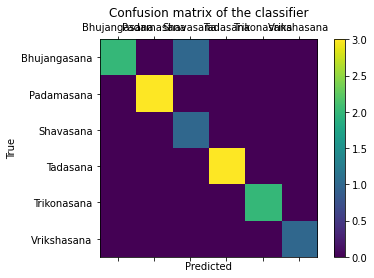

In [30]:
from sklearn.metrics import confusion_matrix

labels = ['Bhujangasana','Padamasana','Shavasana','Tadasana','Trikonasana','Vrikshasana']
cm = confusion_matrix(y_test,y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [31]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9230769230769231

In [32]:
# hamming loss
hamming_loss = metrics.hamming_loss(y_test, y_pred)
hamming_loss 

0.07692307692307693

In [41]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from keras.layers import LSTM
import numpy as np
# Define per-fold score containers <-- these are new
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=4, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
    
    model = tf.keras.Sequential()
    # model.add(tf.keras.layers.Flatten())
    # output embedding dimension of size 64.
    model.add(tf.keras.layers.Input(shape=(77,34)))
    model.add(tf.keras.layers.Dense(64))


    # Add a LSTM layer with 128 internal units.
    model.add(tf.keras.layers.Bidirectional(LSTM(128)))


    # Add a Dense layer with 6 units.
    model.add(tf.keras.layers.Dense(6))
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=opt,
        metrics=["accuracy"],
    )
    history = model.fit(inputs[train], targets[train],
              validation_data=(x_test,y_test), epochs=140, batch_size=32)
    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Epoch 1/140
4/4 [==============================] - 13s 887ms/step - loss: 1.9468 - accuracy: 0.1280 - val_loss: 1.7485 - val_accuracy: 0.2174
Epoch 2/140
4/4 [==============================] - 1s 207ms/step - loss: 1.6549 - accuracy: 0.2480 - val_loss: 1.2693 - val_accuracy: 0.4783
Epoch 3/140
4/4 [==============================] - 1s 213ms/step - loss: 1.4730 - accuracy: 0.3520 - val_loss: 1.3857 - val_accuracy: 0.3913
Epoch 4/140
4/4 [==============================] - 1s 245ms/step - loss: 1.4125 - accuracy: 0.3440 - val_loss: 1.1673 - val_accuracy: 0.4348
Epoch 5/140
4/4 [==============================] - 1s 201ms/step - loss: 1.2595 - accuracy: 0.4480 - val_loss: 1.0823 - val_accuracy: 0.6522
Epoch 6/140
4/4 [==============================] - 1s 261ms/step - loss: 1.1261 - accuracy: 0.5120 - val_loss: 1.1323 - val_accuracy: 0.4783
Epoch 7/140
4/4 [==============================] - 1s 240ms/step - loss: 1.0359 - accuracy: 0.5520 - val_loss: 0.7786 - val_accuracy: 0.7391
Epoch 8/140


Epoch 59/140
4/4 [==============================] - 1s 203ms/step - loss: 0.4075 - accuracy: 0.8560 - val_loss: 0.2688 - val_accuracy: 0.9130
Epoch 60/140
4/4 [==============================] - 1s 193ms/step - loss: 0.3238 - accuracy: 0.8560 - val_loss: 0.3325 - val_accuracy: 0.8696
Epoch 61/140
4/4 [==============================] - 1s 212ms/step - loss: 0.2665 - accuracy: 0.8720 - val_loss: 0.1626 - val_accuracy: 0.9565
Epoch 62/140
4/4 [==============================] - 1s 200ms/step - loss: 0.2382 - accuracy: 0.9280 - val_loss: 0.2628 - val_accuracy: 0.9130
Epoch 63/140
4/4 [==============================] - 1s 196ms/step - loss: 0.3436 - accuracy: 0.8480 - val_loss: 0.3462 - val_accuracy: 0.9130
Epoch 64/140
4/4 [==============================] - 1s 204ms/step - loss: 0.3686 - accuracy: 0.8480 - val_loss: 0.3529 - val_accuracy: 0.9130
Epoch 65/140
4/4 [==============================] - 1s 193ms/step - loss: 0.2935 - accuracy: 0.8800 - val_loss: 0.2837 - val_accuracy: 0.9130
Epoch 

4/4 [==============================] - 1s 180ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.4011 - val_accuracy: 0.9130
Epoch 117/140
4/4 [==============================] - 1s 176ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.4036 - val_accuracy: 0.9130
Epoch 118/140
4/4 [==============================] - 1s 222ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.4057 - val_accuracy: 0.9130
Epoch 119/140
4/4 [==============================] - 1s 249ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4046 - val_accuracy: 0.9130
Epoch 120/140
4/4 [==============================] - 1s 237ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.4079 - val_accuracy: 0.9130
Epoch 121/140
4/4 [==============================] - 1s 233ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4100 - val_accuracy: 0.9130
Epoch 122/140
4/4 [==============================] - 1s 260ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.4138 - val_accuracy: 0.9130
Epoch 123/140

Giving up send_request(...) after 11 tries (requests.exceptions.SSLError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1124)'))))
error uploading: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1124)')))


Epoch 1/140
4/4 [==============================] - 7s 674ms/step - loss: 2.0110 - accuracy: 0.2080 - val_loss: 1.7537 - val_accuracy: 0.2174
Epoch 2/140
4/4 [==============================] - 1s 200ms/step - loss: 1.8531 - accuracy: 0.2720 - val_loss: 1.5003 - val_accuracy: 0.5652
Epoch 3/140
4/4 [==============================] - 1s 257ms/step - loss: 1.6469 - accuracy: 0.3600 - val_loss: 1.4195 - val_accuracy: 0.4348
Epoch 4/140
4/4 [==============================] - 1s 211ms/step - loss: 1.5739 - accuracy: 0.2000 - val_loss: 1.2140 - val_accuracy: 0.6522
Epoch 5/140
4/4 [==============================] - 1s 223ms/step - loss: 1.3695 - accuracy: 0.3760 - val_loss: 1.2530 - val_accuracy: 0.4348
Epoch 6/140
4/4 [==============================] - 1s 177ms/step - loss: 1.3384 - accuracy: 0.4320 - val_loss: 1.1104 - val_accuracy: 0.4348
Epoch 7/140
4/4 [==============================] - 1s 169ms/step - loss: 1.1137 - accuracy: 0.5040 - val_loss: 0.8515 - val_accuracy: 0.5652
Epoch 8/140
4

4/4 [==============================] - 1s 168ms/step - loss: 0.3024 - accuracy: 0.9040 - val_loss: 0.2134 - val_accuracy: 0.9565
Epoch 59/140
4/4 [==============================] - 1s 155ms/step - loss: 0.3579 - accuracy: 0.8400 - val_loss: 0.1459 - val_accuracy: 1.0000
Epoch 60/140
4/4 [==============================] - 1s 158ms/step - loss: 0.3436 - accuracy: 0.8560 - val_loss: 0.1905 - val_accuracy: 0.9565
Epoch 61/140
4/4 [==============================] - 1s 171ms/step - loss: 0.4535 - accuracy: 0.8640 - val_loss: 0.3018 - val_accuracy: 0.8696
Epoch 62/140
4/4 [==============================] - 1s 170ms/step - loss: 0.5421 - accuracy: 0.8000 - val_loss: 0.7352 - val_accuracy: 0.6957
Epoch 63/140
4/4 [==============================] - 1s 173ms/step - loss: 0.6917 - accuracy: 0.7200 - val_loss: 1.3745 - val_accuracy: 0.6087
Epoch 64/140
4/4 [==============================] - 1s 168ms/step - loss: 1.1178 - accuracy: 0.5040 - val_loss: 1.2811 - val_accuracy: 0.6087
Epoch 65/140
4/4 [=

Epoch 116/140
4/4 [==============================] - 1s 167ms/step - loss: 0.0355 - accuracy: 0.9920 - val_loss: 0.0638 - val_accuracy: 0.9565
Epoch 117/140
4/4 [==============================] - 1s 190ms/step - loss: 0.0776 - accuracy: 0.9760 - val_loss: 0.5415 - val_accuracy: 0.7391
Epoch 118/140
4/4 [==============================] - 1s 184ms/step - loss: 0.2001 - accuracy: 0.9280 - val_loss: 0.3258 - val_accuracy: 0.9130
Epoch 119/140
4/4 [==============================] - 1s 179ms/step - loss: 0.2240 - accuracy: 0.9200 - val_loss: 0.1085 - val_accuracy: 0.9565
Epoch 120/140
4/4 [==============================] - 1s 207ms/step - loss: 0.1362 - accuracy: 0.9600 - val_loss: 0.0821 - val_accuracy: 0.9565
Epoch 121/140
4/4 [==============================] - 1s 167ms/step - loss: 0.1350 - accuracy: 0.9360 - val_loss: 0.1201 - val_accuracy: 0.9565
Epoch 122/140
4/4 [==============================] - 1s 166ms/step - loss: 0.1022 - accuracy: 0.9680 - val_loss: 0.0918 - val_accuracy: 0.9565

4/4 [==============================] - 1s 167ms/step - loss: 1.8178 - accuracy: 0.4720 - val_loss: 1.0264 - val_accuracy: 0.7391
Epoch 34/140
4/4 [==============================] - 1s 150ms/step - loss: 1.0017 - accuracy: 0.6000 - val_loss: 0.8251 - val_accuracy: 0.5217
Epoch 35/140
4/4 [==============================] - 1s 155ms/step - loss: 0.8217 - accuracy: 0.6480 - val_loss: 0.7279 - val_accuracy: 0.7391
Epoch 36/140
4/4 [==============================] - 1s 175ms/step - loss: 1.0030 - accuracy: 0.5840 - val_loss: 0.7816 - val_accuracy: 0.6522
Epoch 37/140
4/4 [==============================] - 1s 183ms/step - loss: 0.9074 - accuracy: 0.6240 - val_loss: 0.7814 - val_accuracy: 0.6522
Epoch 38/140
4/4 [==============================] - 1s 173ms/step - loss: 0.8347 - accuracy: 0.6240 - val_loss: 0.8991 - val_accuracy: 0.4783
Epoch 39/140
4/4 [==============================] - 1s 152ms/step - loss: 0.8639 - accuracy: 0.6400 - val_loss: 0.7884 - val_accuracy: 0.6087
Epoch 40/140
4/4 [=

Epoch 91/140
4/4 [==============================] - 1s 172ms/step - loss: 0.2666 - accuracy: 0.8960 - val_loss: 0.2819 - val_accuracy: 0.9130
Epoch 92/140
4/4 [==============================] - 1s 164ms/step - loss: 0.2803 - accuracy: 0.9120 - val_loss: 0.2303 - val_accuracy: 0.9130
Epoch 93/140
4/4 [==============================] - 1s 156ms/step - loss: 0.2947 - accuracy: 0.8880 - val_loss: 0.2558 - val_accuracy: 0.9130
Epoch 94/140
4/4 [==============================] - 1s 234ms/step - loss: 0.3490 - accuracy: 0.8720 - val_loss: 0.2622 - val_accuracy: 0.9130
Epoch 95/140
4/4 [==============================] - 1s 169ms/step - loss: 0.3252 - accuracy: 0.9040 - val_loss: 0.3003 - val_accuracy: 0.8696
Epoch 96/140
4/4 [==============================] - 1s 153ms/step - loss: 0.2864 - accuracy: 0.8720 - val_loss: 0.2097 - val_accuracy: 0.9565
Epoch 97/140
4/4 [==============================] - 1s 208ms/step - loss: 0.2452 - accuracy: 0.9040 - val_loss: 0.2130 - val_accuracy: 0.9565
Epoch 

Epoch 8/140
4/4 [==============================] - 1s 160ms/step - loss: 1.0401 - accuracy: 0.5397 - val_loss: 0.9041 - val_accuracy: 0.5652
Epoch 9/140
4/4 [==============================] - 1s 164ms/step - loss: 0.9262 - accuracy: 0.5397 - val_loss: 1.5884 - val_accuracy: 0.4348
Epoch 10/140
4/4 [==============================] - 1s 169ms/step - loss: 1.3535 - accuracy: 0.4206 - val_loss: 0.9302 - val_accuracy: 0.5652
Epoch 11/140
4/4 [==============================] - 1s 166ms/step - loss: 1.0275 - accuracy: 0.5476 - val_loss: 0.7332 - val_accuracy: 0.6522
Epoch 12/140
4/4 [==============================] - 1s 163ms/step - loss: 0.8905 - accuracy: 0.6190 - val_loss: 0.5811 - val_accuracy: 0.7826
Epoch 13/140
4/4 [==============================] - 1s 157ms/step - loss: 0.7534 - accuracy: 0.6984 - val_loss: 0.5720 - val_accuracy: 0.7826
Epoch 14/140
4/4 [==============================] - 1s 165ms/step - loss: 0.7161 - accuracy: 0.6984 - val_loss: 0.4183 - val_accuracy: 0.9130
Epoch 15

Epoch 66/140
4/4 [==============================] - 1s 161ms/step - loss: 0.2695 - accuracy: 0.9048 - val_loss: 0.0632 - val_accuracy: 1.0000
Epoch 67/140
4/4 [==============================] - 1s 159ms/step - loss: 0.1746 - accuracy: 0.9286 - val_loss: 0.1945 - val_accuracy: 0.9130
Epoch 68/140
4/4 [==============================] - 1s 155ms/step - loss: 0.2601 - accuracy: 0.9127 - val_loss: 0.0610 - val_accuracy: 1.0000
Epoch 69/140
4/4 [==============================] - 1s 154ms/step - loss: 0.2314 - accuracy: 0.9206 - val_loss: 0.1978 - val_accuracy: 0.9130
Epoch 70/140
4/4 [==============================] - 1s 161ms/step - loss: 0.3770 - accuracy: 0.8810 - val_loss: 0.2045 - val_accuracy: 0.9130
Epoch 71/140
4/4 [==============================] - 1s 175ms/step - loss: 0.4951 - accuracy: 0.7778 - val_loss: 0.1368 - val_accuracy: 0.9565
Epoch 72/140
4/4 [==============================] - 1s 182ms/step - loss: 0.3289 - accuracy: 0.9048 - val_loss: 0.9223 - val_accuracy: 0.6957
Epoch 

4/4 [==============================] - 1s 181ms/step - loss: 0.5296 - accuracy: 0.8413 - val_loss: 0.6104 - val_accuracy: 0.8261
Epoch 124/140
4/4 [==============================] - 1s 158ms/step - loss: 0.3087 - accuracy: 0.8968 - val_loss: 0.2437 - val_accuracy: 0.9565
Epoch 125/140
4/4 [==============================] - 1s 134ms/step - loss: 0.4176 - accuracy: 0.8571 - val_loss: 0.2396 - val_accuracy: 0.8696
Epoch 126/140
4/4 [==============================] - 1s 135ms/step - loss: 0.3651 - accuracy: 0.9206 - val_loss: 0.1430 - val_accuracy: 0.9130
Epoch 127/140
4/4 [==============================] - 1s 138ms/step - loss: 0.4610 - accuracy: 0.8254 - val_loss: 0.1739 - val_accuracy: 0.9130
Epoch 128/140
4/4 [==============================] - 1s 151ms/step - loss: 0.2492 - accuracy: 0.9286 - val_loss: 0.5060 - val_accuracy: 0.7391
Epoch 129/140
4/4 [==============================] - 1s 150ms/step - loss: 0.4065 - accuracy: 0.8571 - val_loss: 0.1307 - val_accuracy: 0.9565
Epoch 130/140

In [42]:
model.save("savemodel.h5")